In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [32]:
df = pd.read_csv('diabetes.csv')

In [33]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
df.shape

(768, 9)

In [35]:
df.info(_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

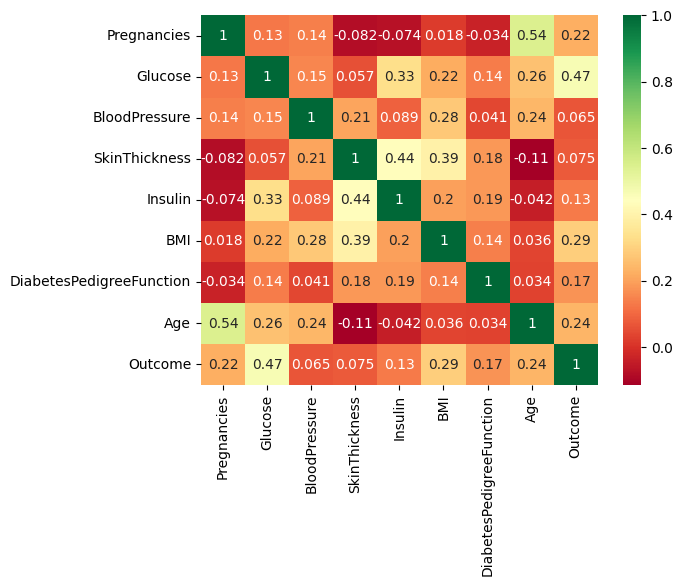

In [38]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')

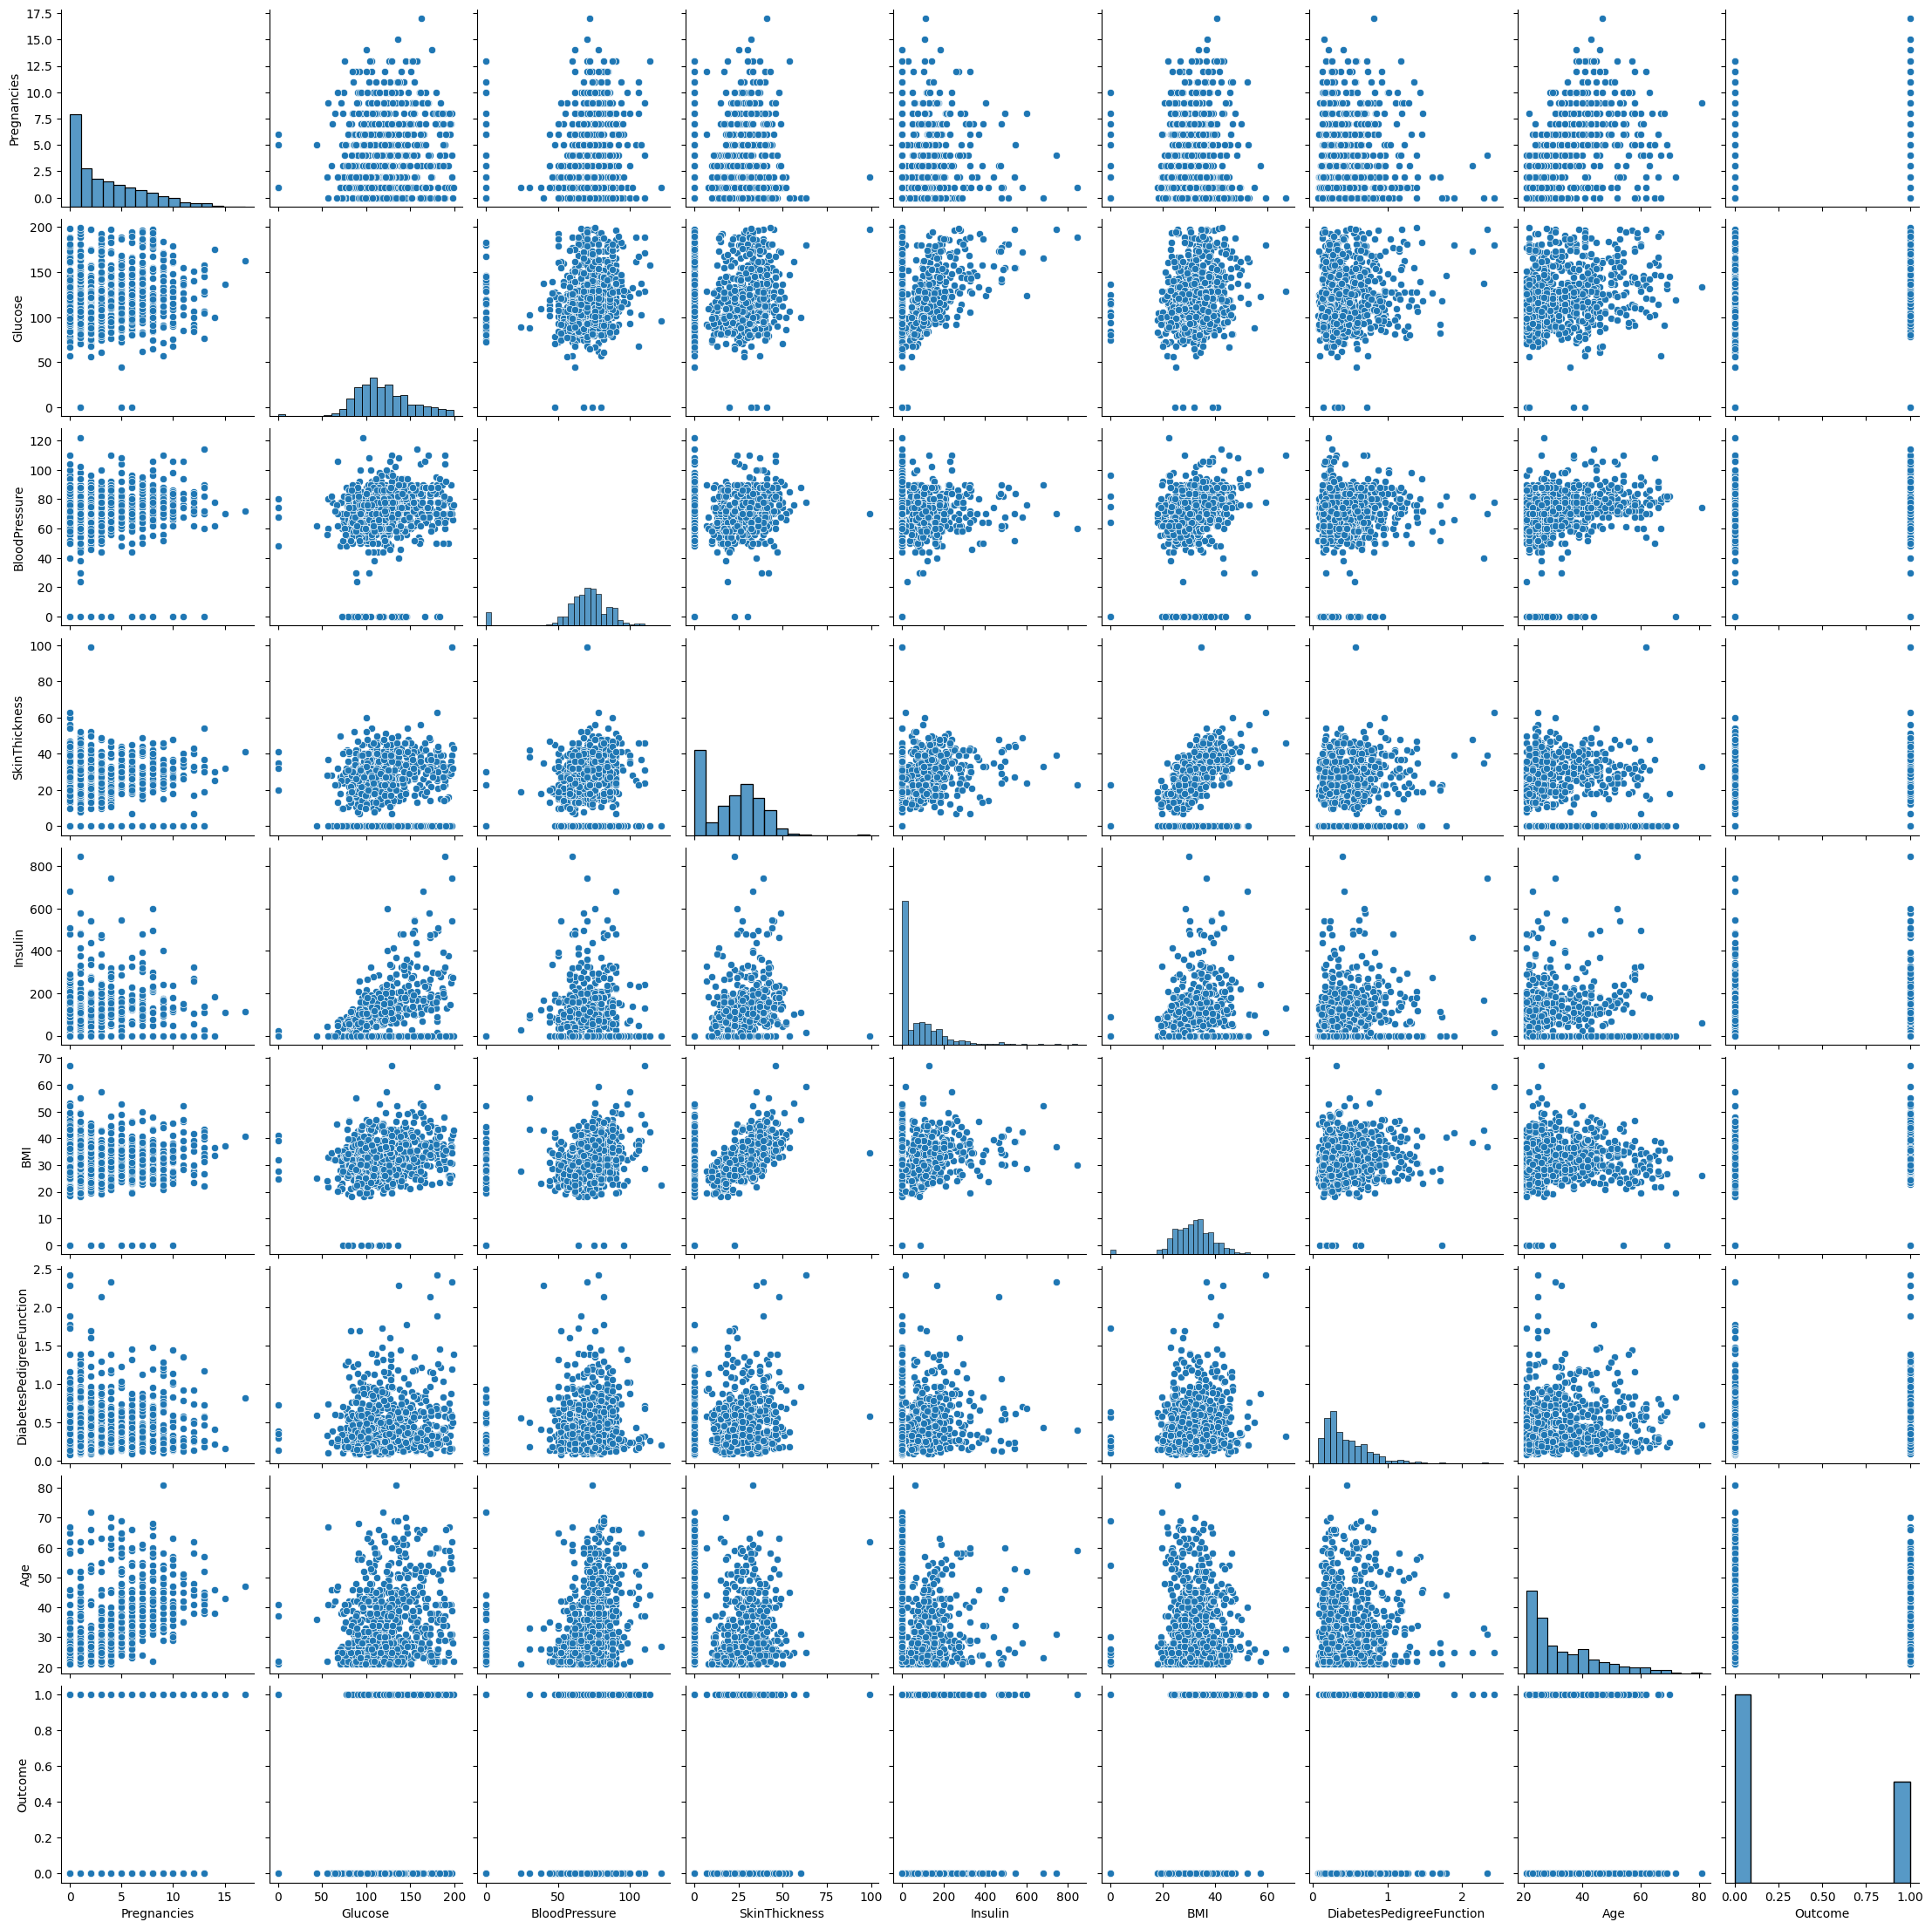

In [39]:
sns.pairplot(df)
plt.show()

In [40]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y = df['Outcome']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [43]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [44]:
model = LinearRegression()


In [45]:
model.fit(X_train, Y_train)

LinearRegression()

In [46]:
model.coef_

array([ 0.01565323,  0.00585266, -0.00248661,  0.00073844, -0.00022976,
        0.01364543,  0.14239101,  0.0035676 ])

In [47]:
coef = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coef

,Coefficient
Pregnancies,0.015653
Glucose,0.005853
BloodPressure,-0.002487
SkinThickness,0.000738
Insulin,-0.000230
BMI,0.013645
DiabetesPedigreeFunction,0.142391
Age,0.003568


In [48]:
pred = model.predict(X_test)

<Axes: xlabel='Outcome'>

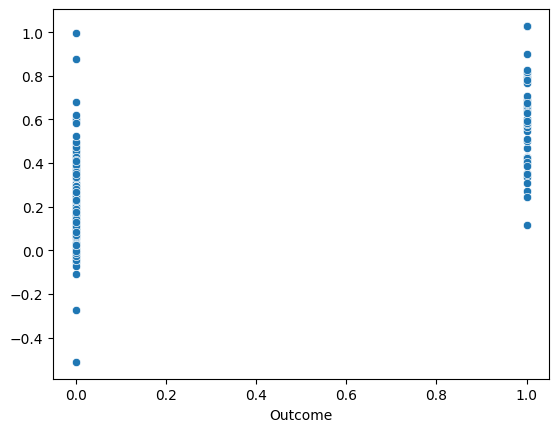

In [49]:
sns.scatterplot(x=Y_test, y=pred) 


In [50]:
score1 = metrics.mean_absolute_error(Y_test, pred)
score2 = metrics.mean_squared_error(Y_test, pred)
score3 = np.sqrt(metrics.mean_squared_error(Y_test, pred))

In [51]:
print(score1, score2, score3)

0.3193161056243205 0.14370648838141725 0.37908638643641274


In [52]:
residual = Y_test - pred
residual

661   -0.027230
122   -0.212534
113   -0.103813
14     0.396065
529   -0.170025
         ...   
476    0.757438
482   -0.085418
230    0.407672
527   -0.130302
380   -0.230727
Name: Outcome, Length: 154, dtype: float64

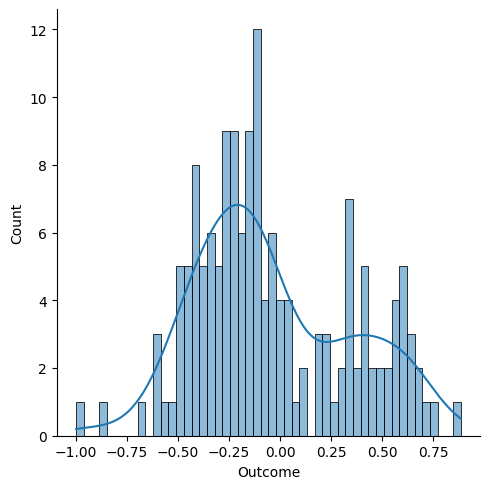

In [53]:
sns.displot(residual, bins=50, kde=True)